<a href="https://colab.research.google.com/github/CAIKAYUBAKA/hds5210-2023/blob/main/Chimdinma's%20%20final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HDS 5210-2021 Final Project**



* Diabetes mellitus is a complex and chronic condition that requires lifelong
management and interaction with a healthcare system. Failure to control risk factors through preventive care may lead to a host of diabetes-related complications.

The purpose of this project is to

* Determine the prevalence of diabetes risk factors among adults aged 20 and above.

* Whether the key determinants such as Age, gender, blood glucose levels, Body Mass Index (BMI), and smoking history increase the risk of developing diabetes mellitus.

* Investigate the factors that contribute to its occurrence if there are disparities in diabetes-related outcomes helping to address health equity concerns.

The outcomes of this project would be to improve the overall management and outcomes of diabetes mellitus.

1. # Data retrieval & manipulation

1-1. Data sources

The following data were retrieved from https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD

kaggle datasets https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

1-2. Diabetes Data

First the diabetes data was downloaded in a csv file and the prevalence of diabetes across ages was downloaded in a json file and merged together because they both had a dependent variable which was age,Then the json_normalize() function was used to normalize JSON data into a flat table, where each row represents a single data point and each column represents a single attribute. . Next, the data in these columns were transformed to numeric to prepare for statistical analyses.and finally sliced to create a dataframe that included only the relevant indicators for the analysis.

In [ ]:
import pandas as pd

# load the data file
url_table1 = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(url_table1)

# Display the first few rows of each table to understand the structure
print("Table 1:")
print(df.head())
df

Table 1:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


This table shows the demographic data from patients, of different ages from 20 and above, along with their diabetes status (positive or negative), their gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level and their likelihood of developing diabetes.

In [ ]:
import requests
import json

# URL to the JSON file
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'

# Fetch the JSON data from the URL
response = requests.get(json_url)


Next, I converted the json file into a pandas dataframe using json normalize()

In [ ]:
import pandas as pd
import json
from pandas import json_normalize

# Load the JSON data from the URL
url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'
response = requests.get(url)
data = response.json()

# Extract metadata and data
meta_data = data['meta']['view']
columns = meta_data['columns']
data_records = data['data']

# Create a DataFrame from the data records
df = pd.DataFrame(data_records, columns=[col['name'] for col in columns])

# Print the DataFrame
print(df)


                   sid                                    id  position  \
0   row-kbg7-yzrm~zi44  00000000-0000-0000-B68C-54475D2E131A         0   
1   row-e9nj_wqtj.a2vh  00000000-0000-0000-5B71-A70F339C42CD         0   
2   row-jxpz_83ii_zyut  00000000-0000-0000-4496-86ED13A37515         0   
3   row-s6qz-itcj_zb66  00000000-0000-0000-6E39-B48EF76101FD         0   
4   row-i6ef-26mc-uyj8  00000000-0000-0000-59B6-A6AA3FFF9F19         0   
..                 ...                                   ...       ...   
91  row-ay4c~g43m.8qqv  00000000-0000-0000-A332-DD053BC3651D         0   
92  row-v5ct_t6z2~k42s  00000000-0000-0000-C969-9DF6323917C9         0   
93  row-ut2r-78wx~hqmx  00000000-0000-0000-401B-501C3C562D40         0   
94  row-aypg.ip7v~asmg  00000000-0000-0000-44E5-23CDA8A4F5FC         0   
95  row-hwy7_cpjj-97um  00000000-0000-0000-371F-2B1A8FF588C9         0   

    created_at created_meta  updated_at updated_meta meta  \
0   1425668434         None  1425668434         No

In [ ]:
# Mapping of old column names to new column names
column_mapping = {
    'Category': 'sex',
    'Category flag': 'age-adjusted',
    'Prevalence Type': 'prevalence type',
    'Category': 'prevalence',
    'Category': 'prevalence rate',
    'Prevalence note': 'prevalence note'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,prevalence rate,age-adjusted,...,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,row-kbg7-yzrm~zi44,00000000-0000-0000-B68C-54475D2E131A,0,1425668434,None,1425668434,None,{ },All persons,5,...,0.4,None,10.7,None,0.5,None,10.6,None,0.5,None
1,row-e9nj_wqtj.a2vh,00000000-0000-0000-5B71-A70F339C42CD,0,1425668434,None,1425668434,None,{ },Male,None,...,0.6,None,12.0,None,0.7,None,11.5,None,0.7,None
2,row-jxpz_83ii_zyut,00000000-0000-0000-4496-86ED13A37515,0,1425668434,None,1425668434,None,{ },Female,None,...,0.5,None,9.5,None,0.5,None,9.8,None,0.5,None
3,row-s6qz-itcj_zb66,00000000-0000-0000-6E39-B48EF76101FD,0,1425668434,None,1425668434,None,{ },Not Hispanic or Latino: White only,None,...,0.4,None,9.1,None,0.5,None,9.0,None,0.6,None
4,row-i6ef-26mc-uyj8,00000000-0000-0000-59B6-A6AA3FFF9F19,0,1425668434,None,1425668434,None,{ },Not Hispanic or Latino: Black or African Ameri...,None,...,1.0,None,15.4,None,0.9,None,16.4,None,0.9,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,row-ay4c~g43m.8qqv,00000000-0000-0000-A332-DD053BC3651D,0,1425668434,None,1425668434,None,{ },Percent of poverty level: 200%-399%,6,...,3.5,None,15.5,None,2.7,None,10.6,*,2.2,None
92,row-v5ct_t6z2~k42s,00000000-0000-0000-C969-9DF6323917C9,0,1425668434,None,1425668434,None,{ },Percent of poverty level: 400% or more,6,...,None,*,15.5,None,3.1,None,14.8,None,2.7,None
93,row-ut2r-78wx~hqmx,00000000-0000-0000-401B-501C3C562D40,0,1425668434,None,1425668434,None,{ },20-44 years,None,...,7.0,None,19.7,*,4.4,None,24.7,None,4.3,None
94,row-aypg.ip7v~asmg,00000000-0000-0000-44E5-23CDA8A4F5FC,0,1425668434,None,1425668434,None,{ },45-64 years,None,...,3.1,None,19.5,None,2.7,None,16.6,None,2.1,None


In [ ]:
#read the CSV file into a DataFrame named diabetes_prediction_dataset.csv
csv_df = pd.read_csv('diabetes_prediction_dataset.csv')
csv_df.head

<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

Next i  merged both dataframes using pd.concat and joined them using Age as a dependent variable.

In [ ]:
# Using 'age' as a float column in csv_df and 'Group' is an object column in df
csv_df['age'] = csv_df['age'].astype(str)  # Convert 'age' to object type
df_copy = df.copy()
df_copy.rename(columns={'Group': 'ages'}, inplace=True)

# Concatenate DataFrames along the 'age' column
merged_df = pd.concat([csv_df, df_copy], axis=1, join='inner')

# Display the merged DataFrame
merged_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sid,...,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,Female,80.0,0,1,never,25.19,6.6,140,0,row-kbg7-yzrm~zi44,...,0.4,None,10.7,None,0.5,None,10.6,None,0.5,None
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,row-e9nj_wqtj.a2vh,...,0.6,None,12.0,None,0.7,None,11.5,None,0.7,None
2,Male,28.0,0,0,never,27.32,5.7,158,0,row-jxpz_83ii_zyut,...,0.5,None,9.5,None,0.5,None,9.8,None,0.5,None
3,Female,36.0,0,0,current,23.45,5.0,155,0,row-s6qz-itcj_zb66,...,0.4,None,9.1,None,0.5,None,9.0,None,0.6,None
4,Male,76.0,1,1,current,20.14,4.8,155,0,row-i6ef-26mc-uyj8,...,1.0,None,15.4,None,0.9,None,16.4,None,0.9,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Female,44.0,0,0,never,37.35,5.7,145,0,row-ay4c~g43m.8qqv,...,3.5,None,15.5,None,2.7,None,10.6,*,2.2,None
92,Male,54.0,0,0,former,32.85,5.0,160,0,row-v5ct_t6z2~k42s,...,None,*,15.5,None,3.1,None,14.8,None,2.7,None
93,Male,38.0,0,0,never,55.61,6.5,130,0,row-ut2r-78wx~hqmx,...,7.0,None,19.7,*,4.4,None,24.7,None,4.3,None
94,Female,60.0,0,0,never,27.32,7.5,300,1,row-aypg.ip7v~asmg,...,3.1,None,19.5,None,2.7,None,16.6,None,2.1,None


In [ ]:
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')
merged_df['age'] = merged_df['age'].fillna(0).astype(int)


In [ ]:
merged_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sid,...,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,Female,80,0,1,never,25.19,6.6,140,0,row-kbg7-yzrm~zi44,...,0.4,None,10.7,None,0.5,None,10.6,None,0.5,None
1,Female,54,0,0,No Info,27.32,6.6,80,0,row-e9nj_wqtj.a2vh,...,0.6,None,12.0,None,0.7,None,11.5,None,0.7,None
2,Male,28,0,0,never,27.32,5.7,158,0,row-jxpz_83ii_zyut,...,0.5,None,9.5,None,0.5,None,9.8,None,0.5,None
3,Female,36,0,0,current,23.45,5.0,155,0,row-s6qz-itcj_zb66,...,0.4,None,9.1,None,0.5,None,9.0,None,0.6,None
4,Male,76,1,1,current,20.14,4.8,155,0,row-i6ef-26mc-uyj8,...,1.0,None,15.4,None,0.9,None,16.4,None,0.9,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Female,44,0,0,never,37.35,5.7,145,0,row-ay4c~g43m.8qqv,...,3.5,None,15.5,None,2.7,None,10.6,*,2.2,None
92,Male,54,0,0,former,32.85,5.0,160,0,row-v5ct_t6z2~k42s,...,None,*,15.5,None,3.1,None,14.8,None,2.7,None
93,Male,38,0,0,never,55.61,6.5,130,0,row-ut2r-78wx~hqmx,...,7.0,None,19.7,*,4.4,None,24.7,None,4.3,None
94,Female,60,0,0,never,27.32,7.5,300,1,row-aypg.ip7v~asmg,...,3.1,None,19.5,None,2.7,None,16.6,None,2.1,None


2. # Compare and visualize the correlation between BMI, Age and blood glucose levels

Descriptive statistics and plots (box, scatterplots, count plots) were used to explore the correlation between the categorical variables and the continuous variables in terms of its prevalence. ANOVA and multiple comparisons were conducted to find the significant differences.

Findings:

There were no significant differences between smoking history and diabetes
but there were significant differnces in BMI and blood_glucose levels followed by Age, a major risk factor for diabetes and prediabetes. The elderly had a higher prevalence of diabetes than the young and middle-aged. As BMI increased, insulin resistance also increased, which results in increased blood glucose levels. The prevalence of diabetes increased with increasing BMI levels leading to higher blood glucose levels too.

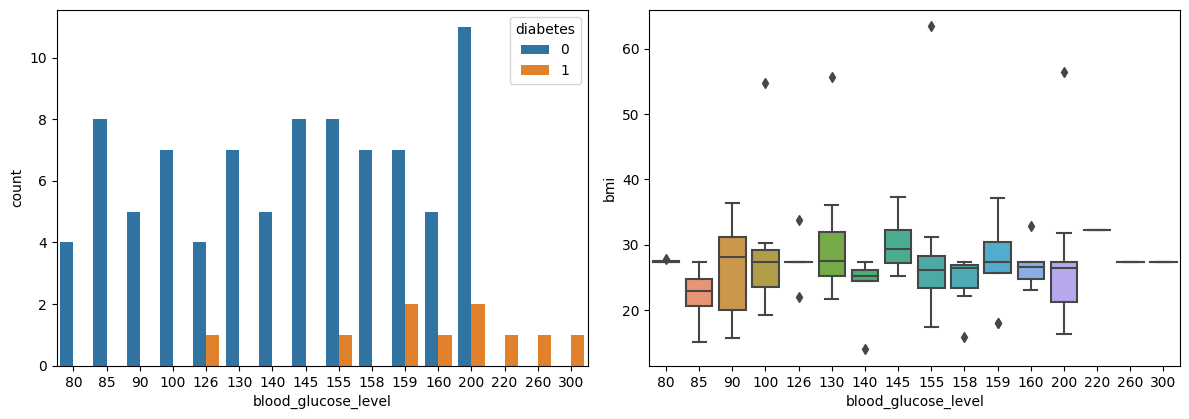

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for blood glucose levels between 50 and 300
filtered_data_blood_glucose = merged_df[(merged_df['blood_glucose_level'] >= 50) & (merged_df['blood_glucose_level'] <= 300)]

# Plotting the graphs
plt.figure(figsize=(12, 8))

# Blood Glucose Level vs Diabetes
plt.subplot(2, 2, 1)
sns.countplot(x='blood_glucose_level', hue='diabetes', data=filtered_data_blood_glucose)

# Boxplot for BMI vs Blood glucose level
plt.subplot(2, 2, 2)
sns.boxplot(x='blood_glucose_level', y='bmi', data=filtered_data_blood_glucose)

plt.tight_layout()
plt.show()


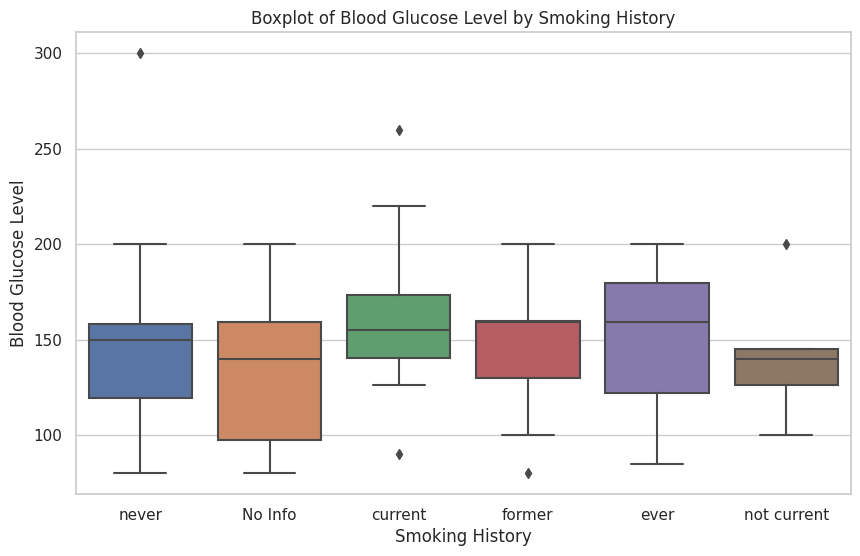

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='smoking_history', y='blood_glucose_level')

# Set labels and title
plt.xlabel('Smoking History')
plt.ylabel('Blood Glucose Level')
plt.title('Boxplot of Blood Glucose Level by Smoking History')

# Show the plot
plt.show()


The "never," "ever," "no info," "current," "former," and "not current" categories have different distributions which suggests that blood glucose levels vary across these smoking history categories.

**Trend in Blood Glucose Levels over Time**

How have blood glucose levels changed over different time periods

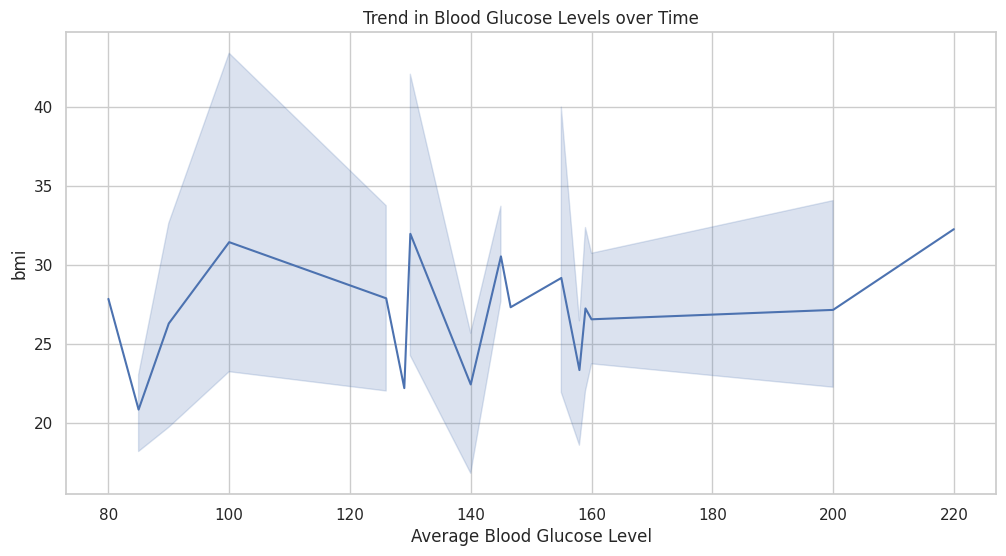

In [ ]:
time_trend_analysis = merged_df.groupby('bmi')['blood_glucose_level'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot( x=time_trend_analysis.values, y=time_trend_analysis.index)
plt.xlabel('Average Blood Glucose Level')
plt.ylabel('bmi')
plt.title('Trend in Blood Glucose Levels over Time')
plt.show()


**Impact of BMI on Blood Glucose Levels**

Is there a correlation between BMI and blood glucose levels?

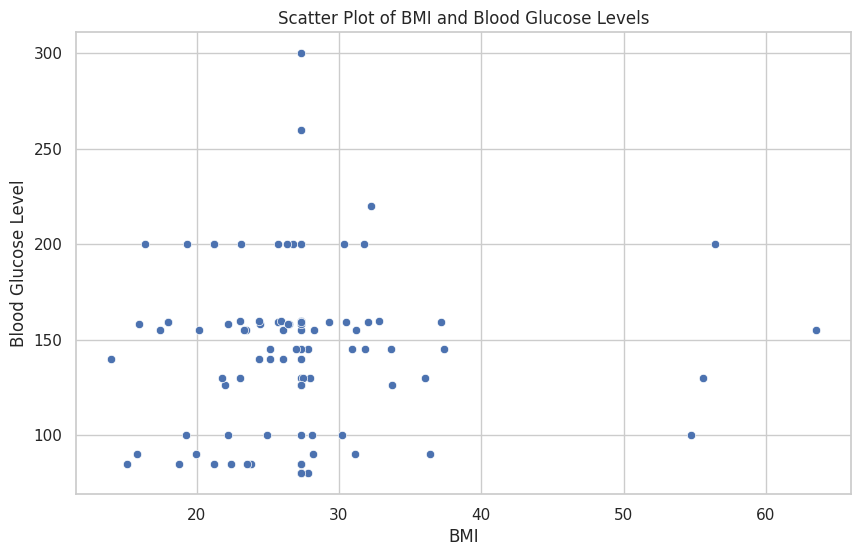

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='blood_glucose_level', data=merged_df)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot of BMI and Blood Glucose Levels')
plt.show()


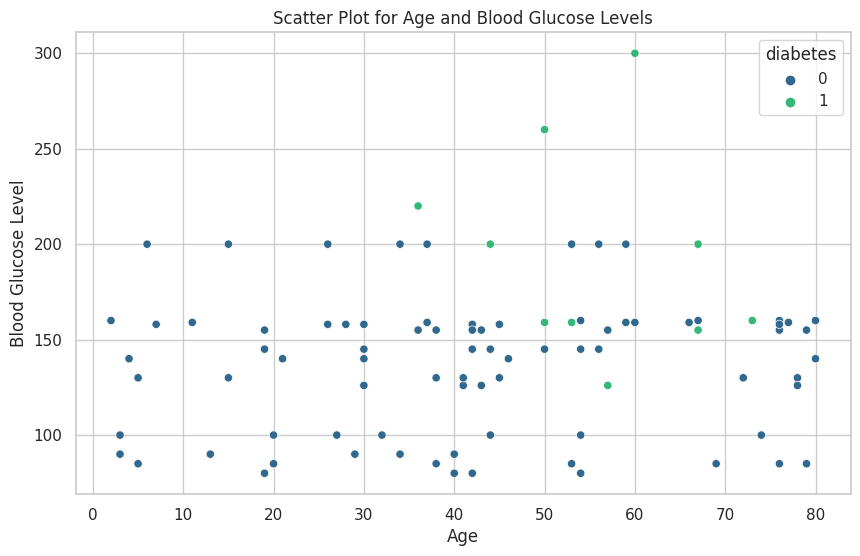

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='age', y='blood_glucose_level', hue='diabetes', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot for Age and Blood Glucose Levels')
plt.show()


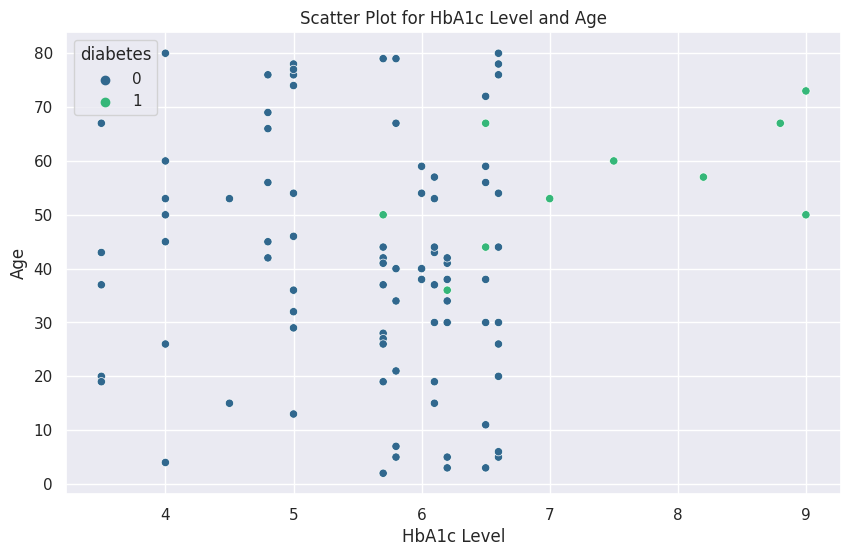

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='HbA1c_level', y='age', hue='diabetes', palette='viridis')
plt.xlabel('HbA1c Level')
plt.ylabel('Age')
plt.title('Scatter Plot for HbA1c Level and Age')
plt.show()


from the scatter plots we can see that there is a moderately strong, positive, linear association between the two variables age and hbA1c level with a few potential outliers and a Strong positive non-linear relationship between age and blood glucose levels

**Age Group Analysis**

Question: How does blood glucose level vary across different age groups?

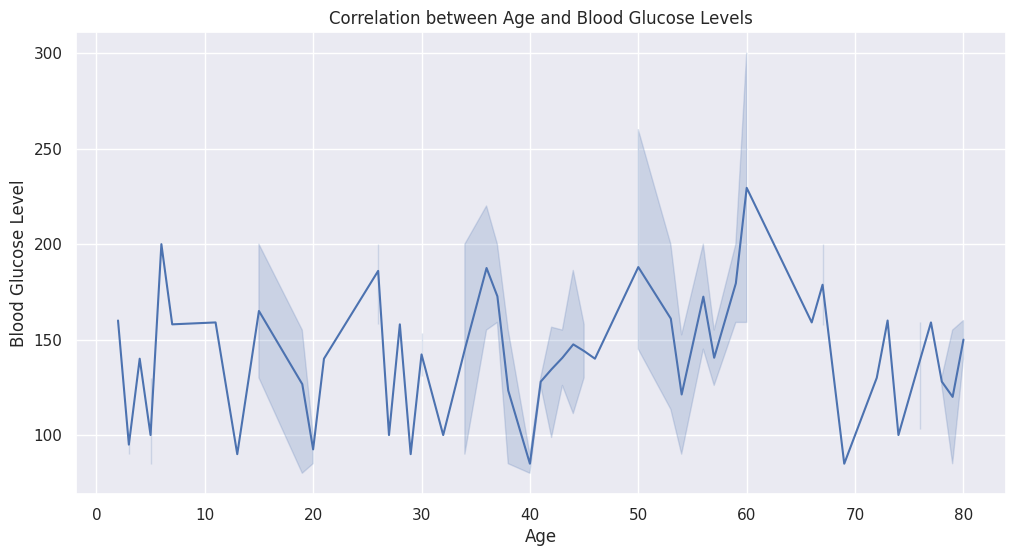

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='blood_glucose_level', data=merged_df)
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Correlation between Age and Blood Glucose Levels')

plt.show()



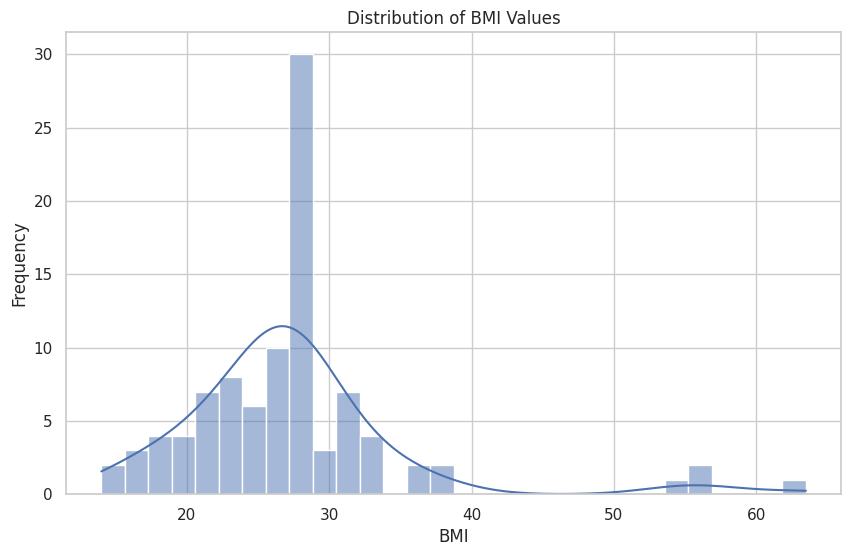

In [ ]:
# Visualize the distribution of BMI values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

From the histogram, we can see that there is a positive association between elevated BMI and the risk of developing diabetes. Individuals with higher BMI values are more likely to develop diabetes leading to higher blood sugar levels.

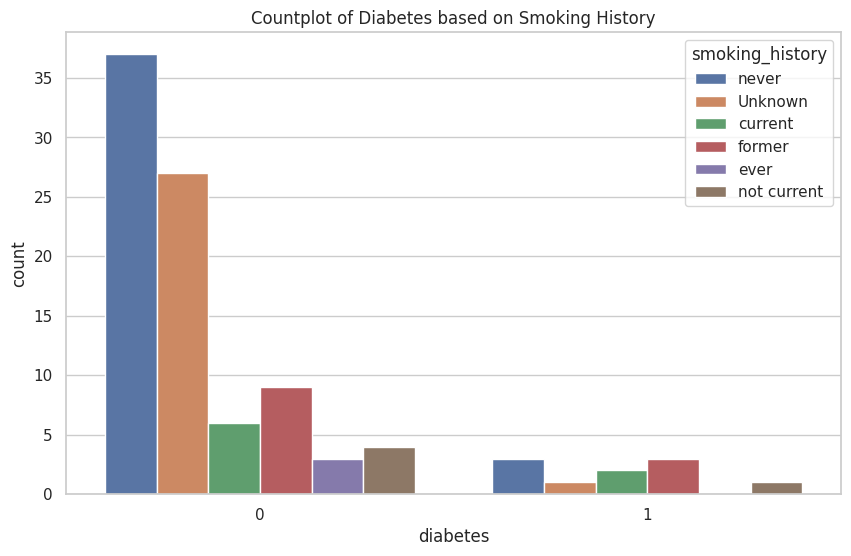

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'No Info' with 'Unknown'
merged_df['smoking_history'] = merged_df['smoking_history'].replace('No Info', 'Unknown')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=merged_df, hue='smoking_history')
plt.title('Countplot of Diabetes based on Smoking History')
plt.show()



<Axes: xlabel='gender', ylabel='count'>

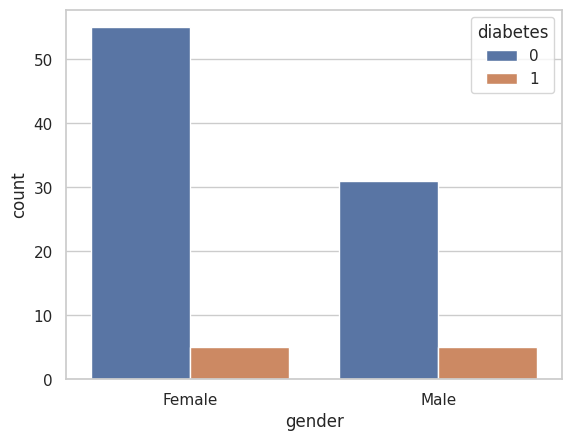

In [ ]:
sns.countplot(x='gender', data=merged_df, hue='diabetes')

**Checking for categorical variables**

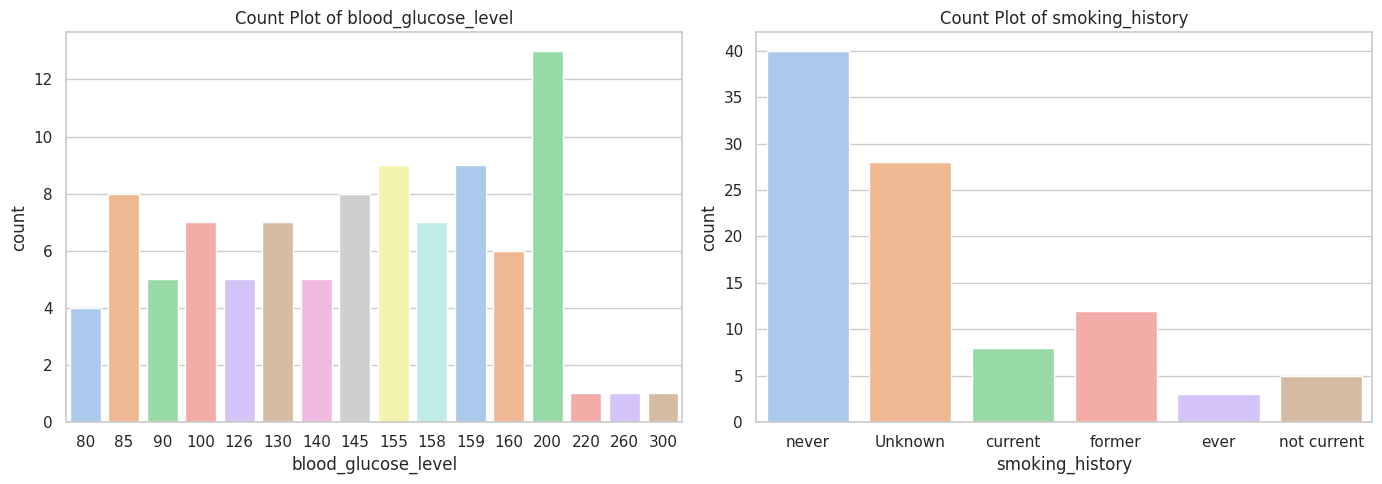

In [ ]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['blood_glucose_level','smoking_history',]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=merged_df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

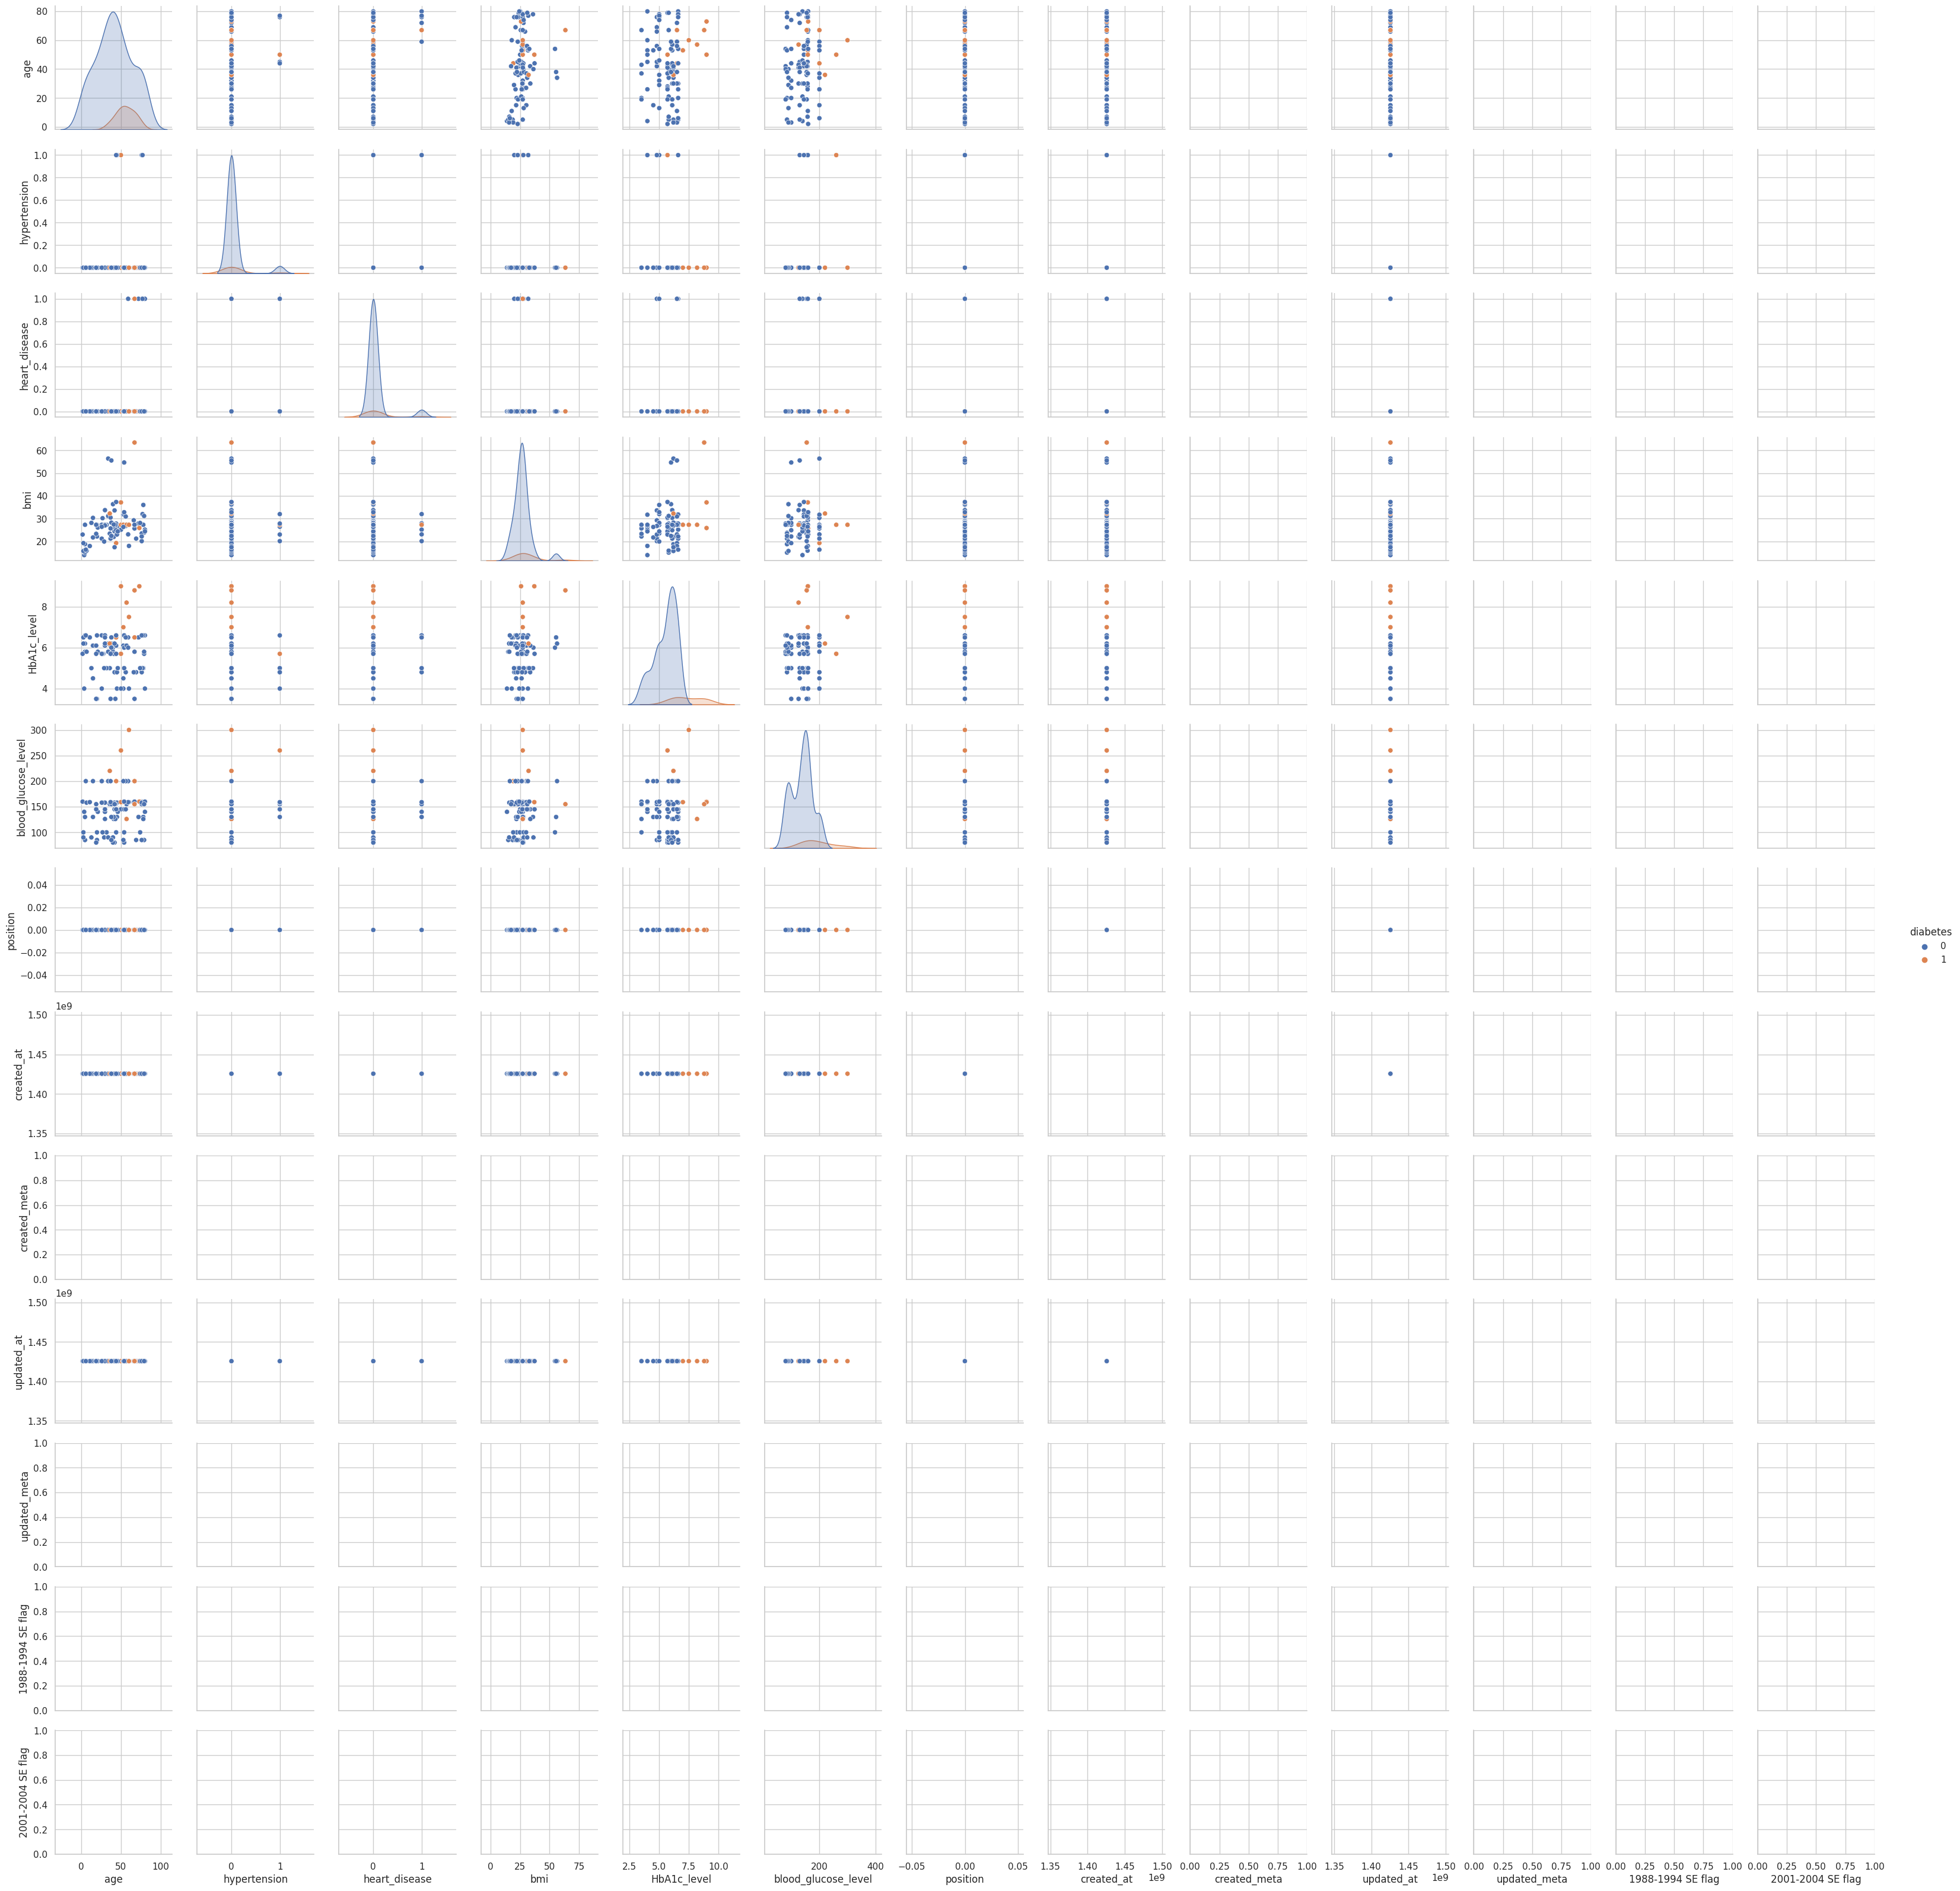

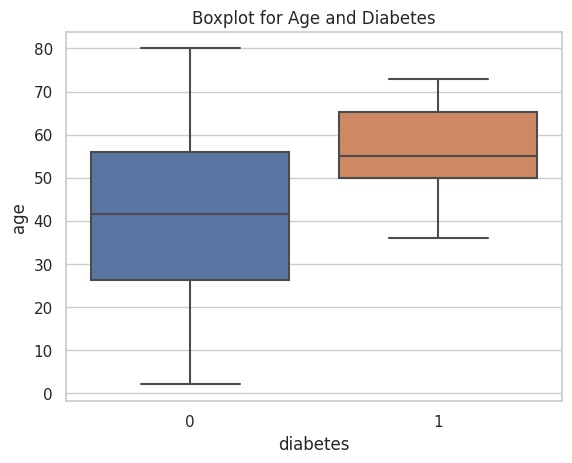

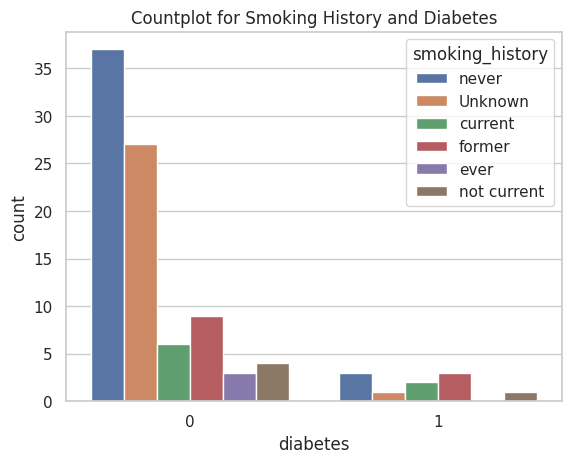

<ipython-input-21-4e117b93fd1a>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


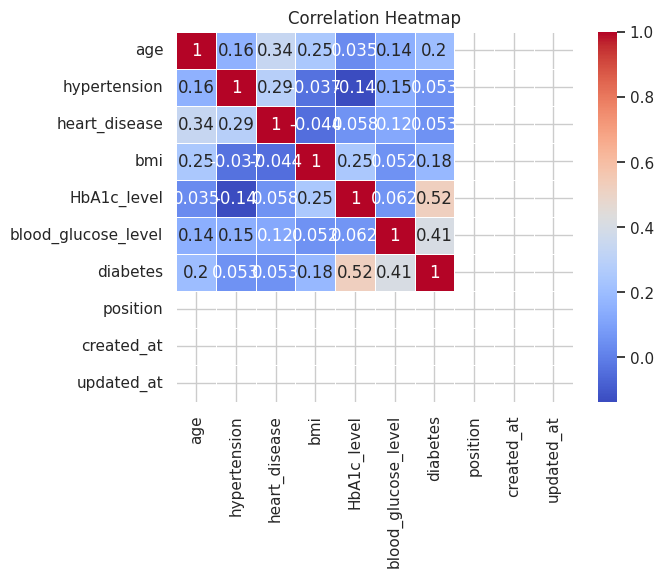

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numeric columns
sns.pairplot(merged_df, hue='diabetes', diag_kind='kde')
plt.show()

# Boxplot for age and diabetes
sns.boxplot(x='diabetes', y='age', data=merged_df)
plt.title('Boxplot for Age and Diabetes')
plt.show()

# Countplot for smoking history and diabetes
sns.countplot(x='diabetes', data=merged_df, hue='smoking_history')
plt.title('Countplot for Smoking History and Diabetes')
plt.show()

# Correlation heatmap
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


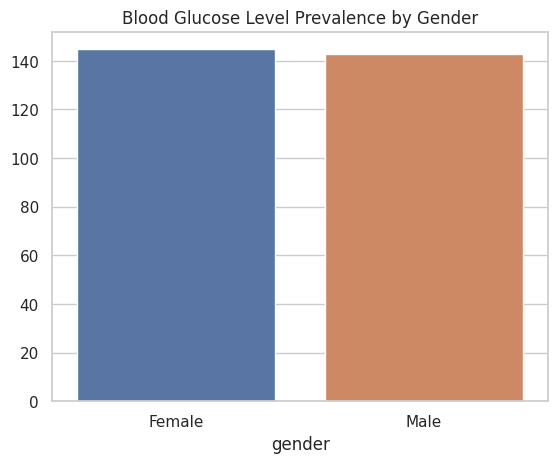

In [ ]:
gender_blood_glucose_prevalence = merged_df.groupby('gender')['blood_glucose_level'].mean()
sns.barplot(x=gender_blood_glucose_prevalence.index, y=gender_blood_glucose_prevalence.values)
plt.title('Blood Glucose Level Prevalence by Gender')
plt.show()


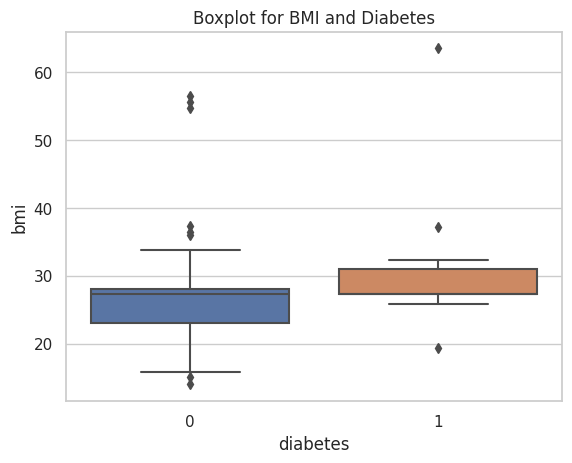

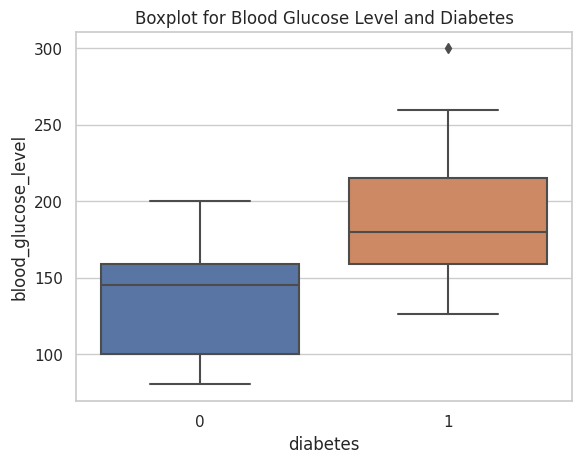

In [ ]:
# Boxplot for BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', data=merged_df)
plt.title('Boxplot for BMI and Diabetes')
plt.show()

# Boxplot for blood glucose level and diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=merged_df)
plt.title('Boxplot for Blood Glucose Level and Diabetes')
plt.show()


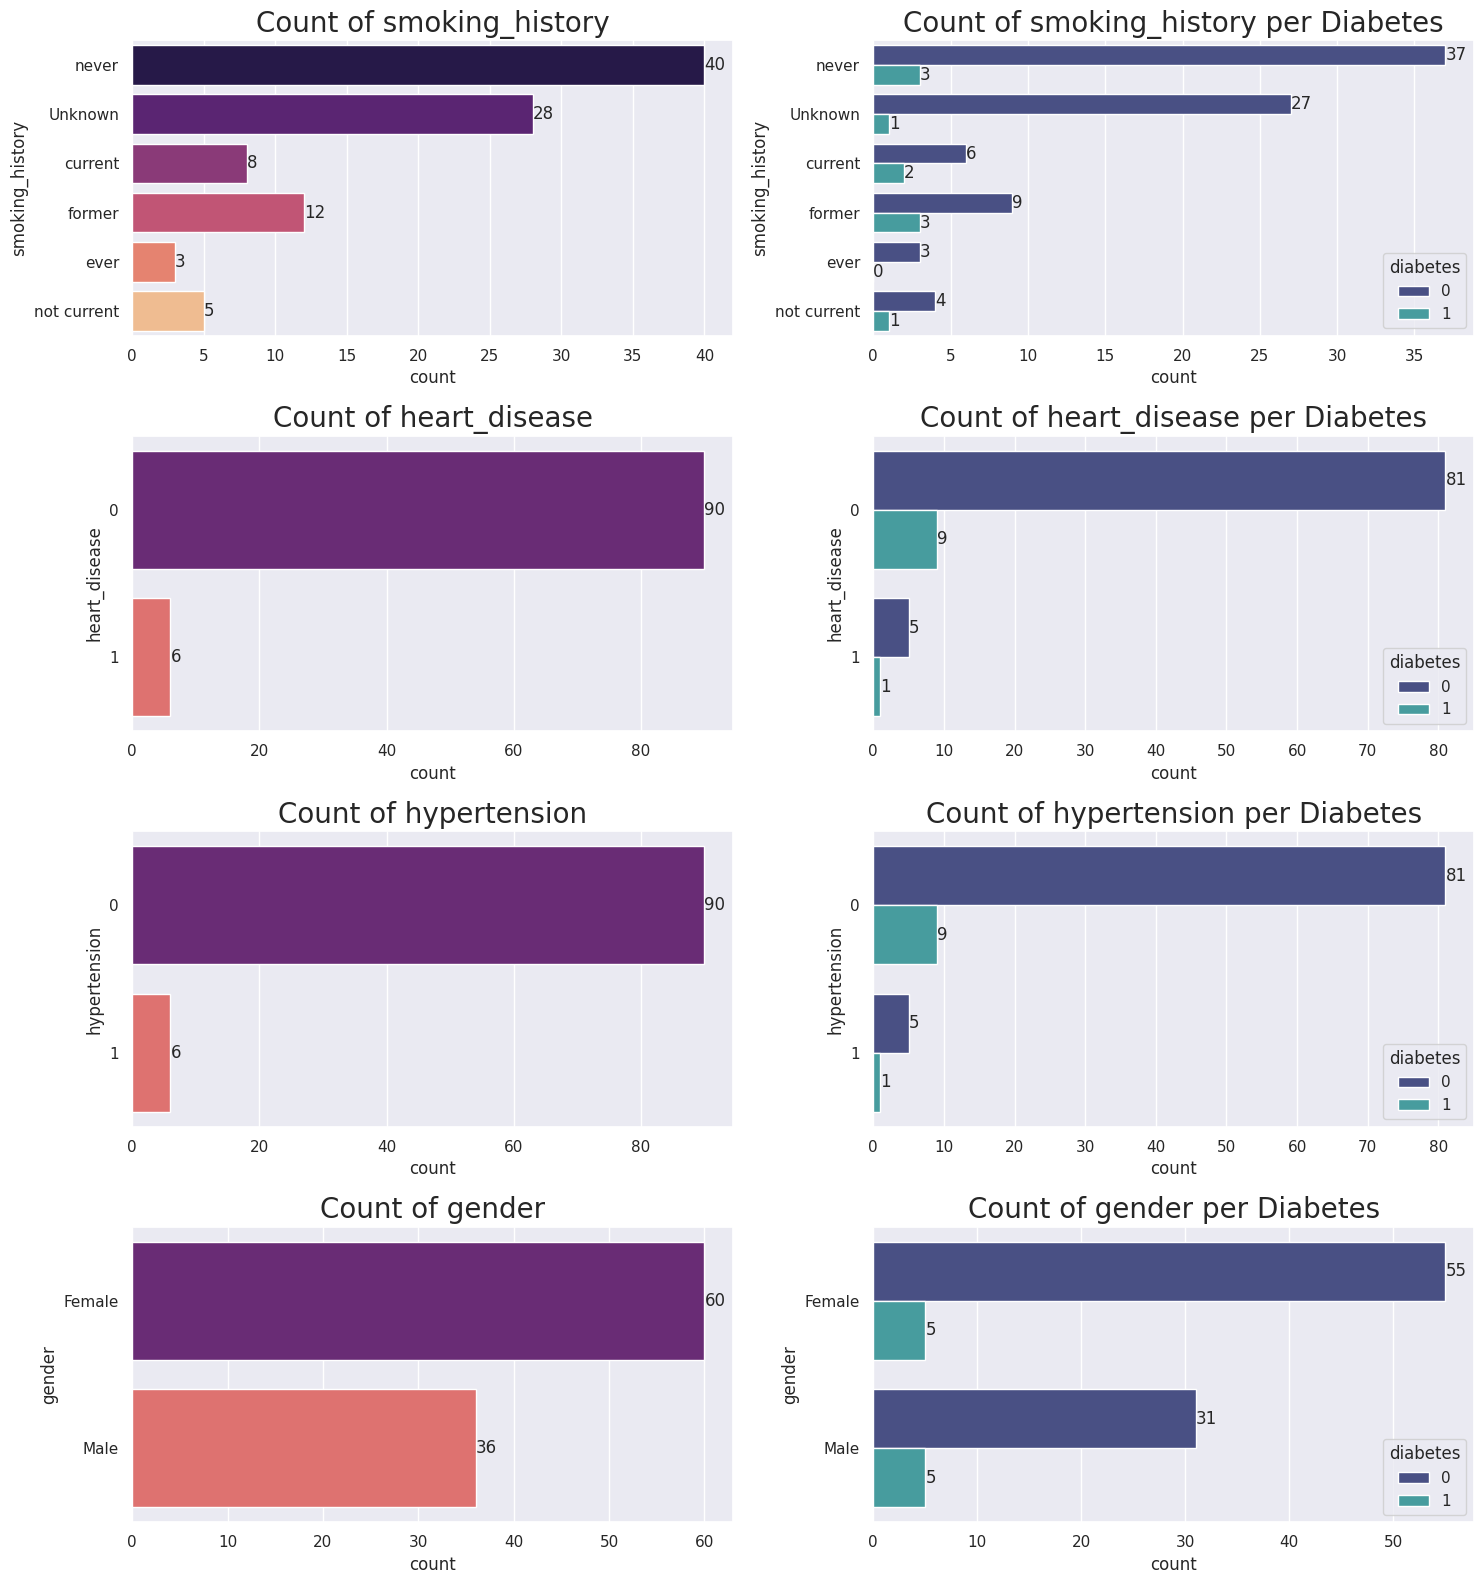

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_columns = ['smoking_history', 'heart_disease', 'hypertension', 'gender']

# Set the darkgrid style
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 4 * len(categorical_columns)))

# Iterate through categorical columns
for idx, col in enumerate(categorical_columns):
    # Countplot for each category
    sns.countplot(data= merged_df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)

    # Countplot for each category with respect to diabetes
    sns.countplot(data=merged_df, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)

plt.tight_layout()
plt.show()


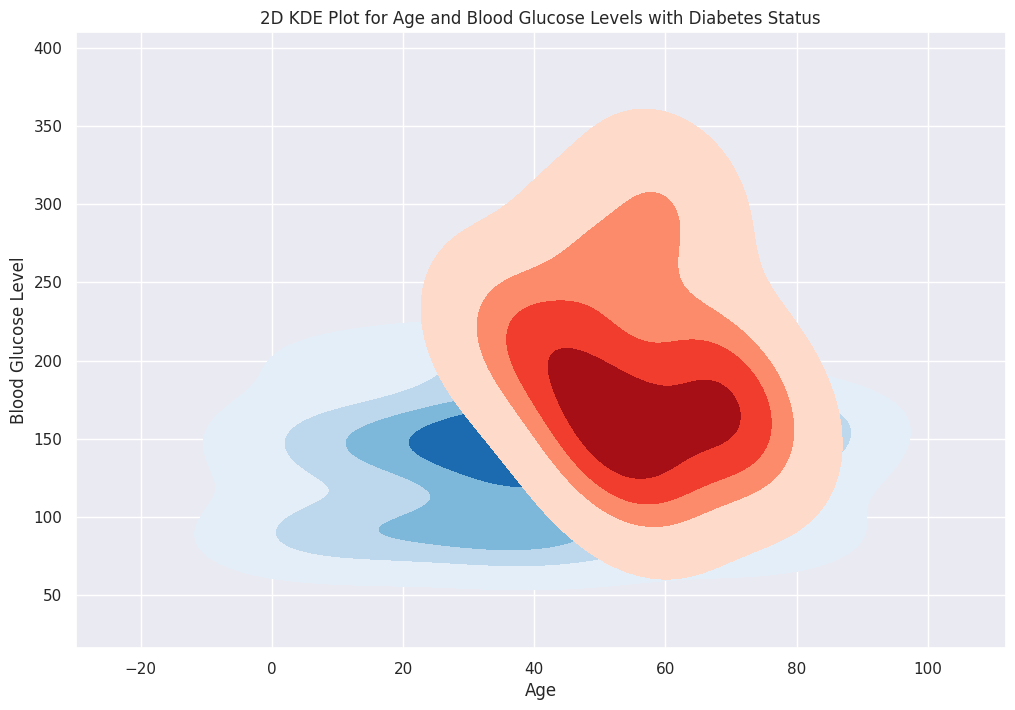

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the data for the plot
plot_data = merged_df[['age', 'blood_glucose_level', 'diabetes']]

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot KDE for non-diabetic individuals
sns.kdeplot(data=plot_data[plot_data['diabetes'] == 0], x='age', y='blood_glucose_level', fill=True, cmap='Blues', levels=5)

# Plot KDE for diabetic individuals
sns.kdeplot(data=plot_data[plot_data['diabetes'] == 1], x='age', y='blood_glucose_level', fill=True, cmap='Reds', levels=5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('2D KDE Plot for Age and Blood Glucose Levels with Diabetes Status')

# Show the plot
plt.show()


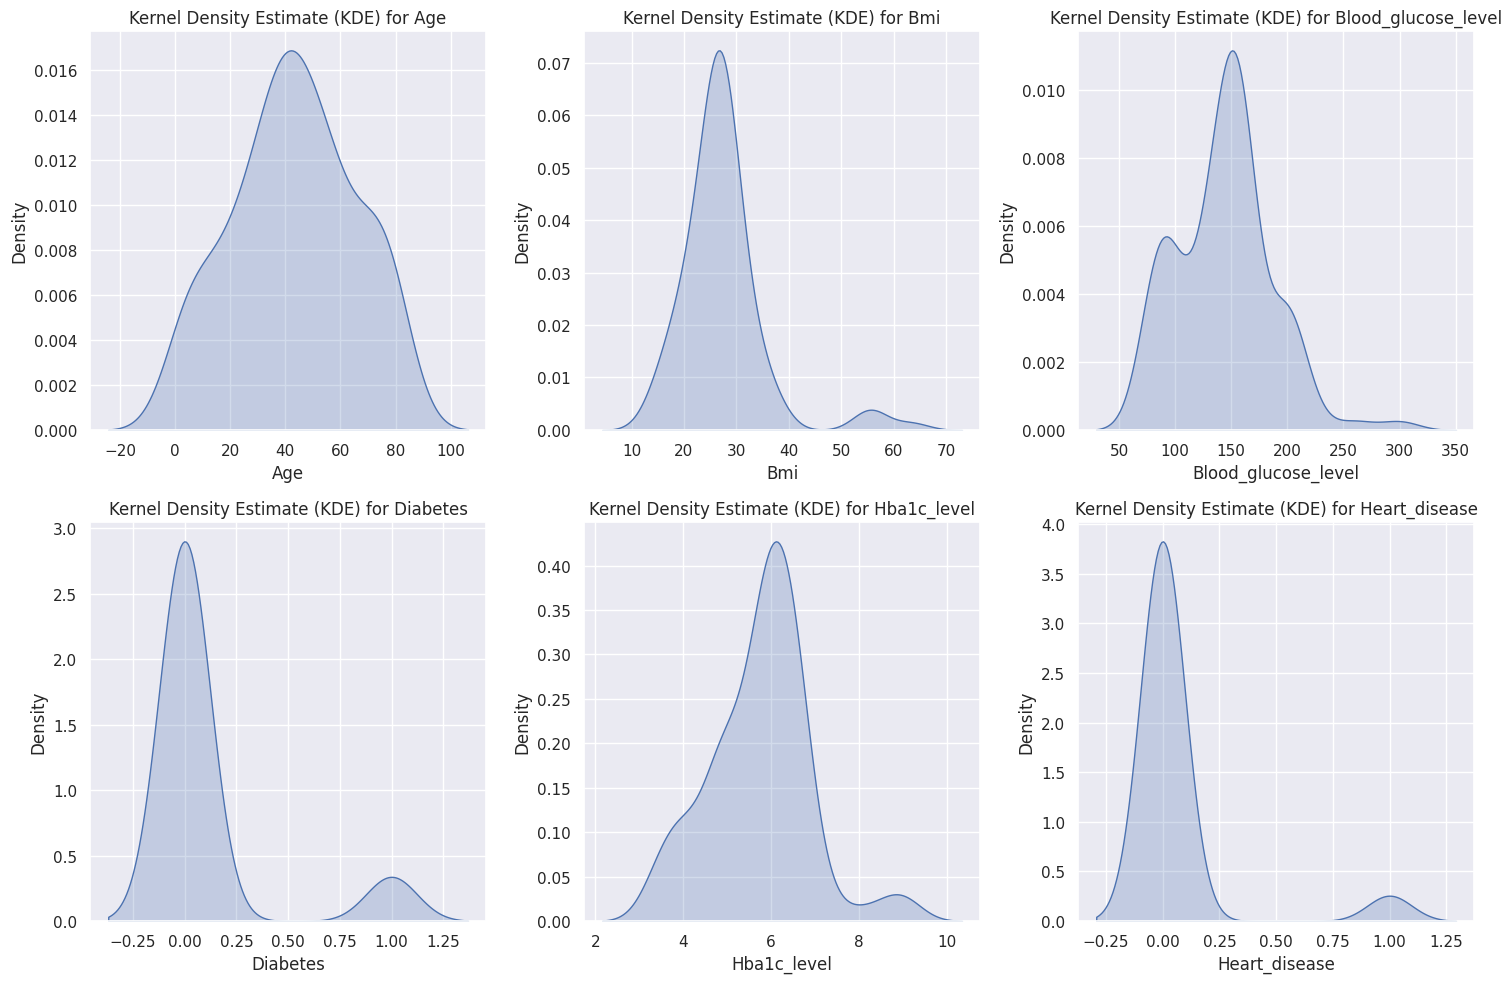

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables for KDE plots
selected_variables = ['age', 'bmi', 'blood_glucose_level', 'diabetes',
   'HbA1c_level', 'heart_disease']

# Plotting KDE for each variable
plt.figure(figsize=(15, 10))

for i, variable in enumerate(selected_variables, start=1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=merged_df, x=variable, fill=True)
    plt.title(f'Kernel Density Estimate (KDE) for {variable.capitalize()}')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


**3. 0 CORRELATIONAL TESTS**

3.1 Across all indicators, the correlation coefficients were similar for the Kendall, Pearson, and Spearman methods. the p-values associated with these coefficients were relatively high, indicating that the observed correlations are not statistically significant at a conventional significance level using (0.05). As such, I do not have sufficient evidence to reject the null hypothesis that there is no correlation between these variables.

In [ ]:
from scipy.stats import f_oneway

# Example for age and smoking history
smoker_age = merged_df[merged_df['smoking_history'] == 'smoker']['age']
non_smoker_age = merged_df[merged_df['smoking_history'] == 'non-smoker']['age']

# Perform ANOVA
f_statistic, p_value = f_oneway(smoker_age, non_smoker_age)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")






F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
from scipy.stats import f_oneway

# Extract data for different levels of 'diabetes'
diabetes_levels = merged_df['diabetes'].unique()
diabetes_groups = [merged_df[merged_df['diabetes'] == level]['blood_glucose_level'] for level in diabetes_levels]

# Perform one-way ANOVA
if len(diabetes_groups) >= 2:
    f_statistic, p_value = f_oneway(*diabetes_groups)

    # Print results
    print(f'ANOVA F-statistic: {f_statistic}')
    print(f'ANOVA p-value: {p_value}')

    # Check significance
    alpha = 0.05
    if p_value < alpha:
        print('The ANOVA test is statistically significant. There are significant differences between group means.')
    else:
        print('The ANOVA test is not statistically significant. There are no significant differences between group means.')
else:
    print('Insufficient data for performing ANOVA. At least two groups are required.')


ANOVA F-statistic: 18.951247883436455
ANOVA p-value: 3.4107245573721525e-05
The ANOVA test is statistically significant. There are significant differences between group means.


In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr

# using  'age' and 'blood_glucose_level' as my columns for analysis
x = merged_df['age']
y = merged_df['blood_glucose_level']

def kendall_pval(x, y):
    return kendalltau(x, y)[1]

def pearsonr_pval(x, y):
    return pearsonr(x, y)[1]

def spearmanr_pval(x, y):
    return spearmanr(x, y)[1]

# Calculate correlations and p-values
kendall_corr, kendall_p_value = kendalltau(x, y)
pearson_corr, pearson_p_value = pearsonr(x, y)
spearman_corr, spearman_p_value = spearmanr(x, y)

# Print results
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p_value}")
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")


Kendall correlation: 0.11604723216392952, p-value: 0.10764916659338114
Pearson correlation: 0.1441003433957168, p-value: 0.16129888029092046
Spearman correlation: 0.16011997033351857, p-value: 0.11914539208922682


In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def corr(merged_df, age, blood_glucose_level):
    """
    The function takes a DataFrame, two strings - the names of two columns of the DataFrame,
    and prints the correlational coefficient and p-value using Kendall, Pearson, and Spearman methods.
    """
    # Extract data for the specified columns
    x = merged_df['age']
    y = merged_df['blood_glucose_level']

    # Calculate correlational coefficient and p-value using three methods
    kendall_coef, kendall_pval = kendalltau(x, y)
    pearson_coef, pearson_pval = pearsonr(x, y)
    spearman_coef, spearman_pval = spearmanr(x, y)

    # Print the results
    print(f'Correlation results for {age} and {blood_glucose_level}:')
    print(f'Kendall Coefficient: {kendall_coef}, p-value: {kendall_pval}')
    print(f'Pearson Coefficient: {pearson_coef}, p-value: {pearson_pval}')
    print(f'Spearman Coefficient: {spearman_coef}, p-value: {spearman_pval}')

# Usage with merged_df DataFrame
correlation_result = corr(merged_df, 'age', 'blood_glucose_level')
correlation_result_age_bmi = corr(merged_df, 'age', 'bmi')
correlation_result_bgl_diabetes = corr(merged_df, 'blood_glucose_level', 'diabetes')
correlation_result_heart_hypertension = corr(merged_df, 'heart_disease', 'hypertension')



Correlation results for age and blood_glucose_level:
Kendall Coefficient: 0.11604723216392952, p-value: 0.10764916659338114
Pearson Coefficient: 0.1441003433957168, p-value: 0.16129888029092046
Spearman Coefficient: 0.16011997033351857, p-value: 0.11914539208922682
Correlation results for age and bmi:
Kendall Coefficient: 0.11604723216392952, p-value: 0.10764916659338114
Pearson Coefficient: 0.1441003433957168, p-value: 0.16129888029092046
Spearman Coefficient: 0.16011997033351857, p-value: 0.11914539208922682
Correlation results for blood_glucose_level and diabetes:
Kendall Coefficient: 0.11604723216392952, p-value: 0.10764916659338114
Pearson Coefficient: 0.1441003433957168, p-value: 0.16129888029092046
Spearman Coefficient: 0.16011997033351857, p-value: 0.11914539208922682
Correlation results for heart_disease and hypertension:
Kendall Coefficient: 0.11604723216392952, p-value: 0.10764916659338114
Pearson Coefficient: 0.1441003433957168, p-value: 0.16129888029092046
Spearman Coeffic

**4.0 Regression analysis to explore the relationship on the health indicators.**

  Regression analysis will be conducted to know how blood glucose level and BMI are related to the likelihood of having diabetes. The results, including coefficients and statistical significance, provide insights into the strength and direction of these relationships.

**4.1 Descriptive Statistics**

In [ ]:
# Descriptive statistics for numeric columns
numeric_stats = merged_df.describe()

# Descriptive statistics for categorical columns
categorical_stats = merged_df.describe(include='O')

# Display descriptive statistics
print("Numeric Statistics:")
print(numeric_stats)

print("\nCategorical Statistics:")
print(categorical_stats)



Numeric Statistics:
             age  hypertension  heart_disease        bmi  HbA1c_level  \
count  96.000000     96.000000      96.000000  96.000000    96.000000   
mean   43.104167      0.062500       0.062500  27.291771     5.732292   
std    21.848512      0.243332       0.243332   7.970312     1.116432   
min     2.000000      0.000000       0.000000  13.990000     3.500000   
25%    28.750000      0.000000       0.000000  23.290000     5.000000   
50%    42.500000      0.000000       0.000000  27.320000     5.800000   
75%    57.500000      0.000000       0.000000  28.130000     6.500000   
max    80.000000      1.000000       1.000000  63.480000     9.000000   

       blood_glucose_level   diabetes  position    created_at    updated_at  
count            96.000000  96.000000      96.0  9.600000e+01  9.600000e+01  
mean            143.979167   0.104167       0.0  1.425668e+09  1.425668e+09  
std              41.776594   0.307080       0.0  0.000000e+00  0.000000e+00  
min       

3.1 Statistical Tests

In [ ]:
#Let's perform some ANOVA tests
from scipy.stats import f_oneway
#For 'age','bmi', 'blood_glucose_levels' and 'diabetes'
diabetes_groups_age = [merged_df[merged_df['diabetes'] == level]['age'] for level in merged_df['diabetes'].unique()]
f_statistic_age, p_value_age = f_oneway(*diabetes_groups_age)
diabetes_groups_bmi = [merged_df[merged_df['diabetes'] == level]['bmi'] for level in merged_df['diabetes'].unique()]
f_statistic_bmi, p_value_bmi = f_oneway(*diabetes_groups_bmi)
diabetes_groups_bg = [merged_df[merged_df['diabetes'] == level]['blood_glucose_level'] for level in merged_df['diabetes'].unique()]
f_statistic_bg, p_value_bg = f_oneway(*diabetes_groups_bg)

print(f'ANOVA F-statistic for Age: {f_statistic_age}')
print(f'ANOVA p-value for Age: {p_value_age}')
print(f'ANOVA F-statistic for BMI: {f_statistic_bmi}')
print(f'ANOVA p-value for BMI: {p_value_bmi}')
print(f'ANOVA F-statistic for Blood Glucose Level: {f_statistic_bg}')
print(f'ANOVA p-value for Blood Glucose Level: {p_value_bg}')

ANOVA F-statistic for Age: 3.820215773493457
ANOVA p-value for Age: 0.05360908075277469
ANOVA F-statistic for BMI: 3.1413074592853216
ANOVA p-value for BMI: 0.0795724451214572
ANOVA F-statistic for Blood Glucose Level: 18.951247883436455
ANOVA p-value for Blood Glucose Level: 3.4107245573721525e-05


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#Using 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', as categorical variables
variables = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Perform ANOVA for each variable
anova_results = {}
for variable in variables:
    groups = [merged_df[merged_df[variable] == level]['age'] for level in merged_df[variable].unique()]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[variable] = {'F-statistic': f_statistic, 'p-value': p_value}

# Display ANOVA results
for variable, result in anova_results.items():
    print(f"ANOVA F-statistic for {variable}: {result['F-statistic']}")
    print(f"ANOVA p-value for {variable}: {result['p-value']}\n")

# Extract p-values for pairwise comparisons using Tukey's HSD
all_data = [merged_df[merged_df[variable] == level]['age'] for variable in variables for level in merged_df[variable].unique()]
all_data = pd.concat(all_data)
result =()




ANOVA F-statistic for hypertension: 2.3194185016584976
ANOVA p-value for hypertension: 0.13112498746398105

ANOVA F-statistic for heart_disease: 12.3928488828052
ANOVA p-value for heart_disease: 0.0006665850969437544

ANOVA F-statistic for bmi: 1.0756786354022039
ANOVA p-value for bmi: 0.43870218554966917

ANOVA F-statistic for HbA1c_level: 1.0384419933267715
ANOVA p-value for HbA1c_level: 0.42736007510970053

ANOVA F-statistic for blood_glucose_level: 0.7950149843636366
ANOVA p-value for blood_glucose_level: 0.6794980465909652



In [ ]:
import statsmodels.api as sm

# Extracting relevant columns from the DataFrame
predictors = merged_df[['bmi', 'diabetes']]
target = merged_df['blood_glucose_level']

# Adding a constant term for the intercept
predictors = sm.add_constant(predictors)

# Creating and fitting the regression model
model = sm.OLS(target, predictors).fit()

# Displaying the regression summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     blood_glucose_level   R-squared:                       0.168
Model:                             OLS   Adj. R-squared:                  0.150
Method:                  Least Squares   F-statistic:                     9.409
Date:                 Mon, 11 Dec 2023   Prob (F-statistic):           0.000190
Time:                         02:41:34   Log-Likelihood:                -485.18
No. Observations:                   96   AIC:                             976.4
Df Residuals:                       93   BIC:                             984.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.3748     14.131     10.00

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected formula
formula = 'age ~ C(diabetes) + blood_glucose_level + HbA1c_level + bmi'

# Fit the model
model = ols(formula, data=merged_df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Create a MultiComparison object for Tukey HSD
comp = mc.MultiComparison(merged_df['age'], merged_df['diabetes'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())



                           sum_sq    df         F    PR(>F)
C(diabetes)           1061.688506   1.0  2.377988  0.126526
blood_glucose_level    120.246650   1.0  0.269331  0.605041
HbA1c_level            553.457775   1.0  1.239644  0.268472
bmi                   2522.683954   1.0  5.650351  0.019546
Residual             40628.313451  91.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  14.0605 0.0536 -0.2229 28.3438  False
----------------------------------------------------


CONCLUSION

Based on the analysis of the diabetes, and prevalence of age datasets, it can be concluded that:


*   Blood glucose levels have highly significant association with diabetes status, while age and BMI show moderate associations with diabetes status that do not quite reach statistical significance. People who smoke cigarettes are 30%–40% more likely to develop diabetes than people who don’t smoke and so had significant consequences.The information about smoking being associated with a higher risk of diabetes could inform preventive measures. Encouraging smoking cessation programs and lifestyle changes may be crucial in diabetes prevention.


* The output from the ANOVA tests provides insights into the potential impact of diabetes status on age, BMI, and blood glucose levels highlighting the potential importance of blood glucose levels in distinguishing different diabetes groups within the dataset.Understanding the potential impact of blood glucose levels on distinguishing different diabetes groups could contribute to the concept of personalized medicine. Tailoring interventions based on individual characteristics, including blood glucose levels, may improve diabetes management.This holistic perspective could guide healthcare practitioners in comprehensive patient assessments.